<a href="https://colab.research.google.com/github/Bilkouristas/oxf-vis-25/blob/master/VIS_LAB1_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import io
from IPython.display import HTML

# Lab 1: Transformations and projection

This lab is designed to introduce you to some of the fundamental concepts and techniques that enable computers to interpret and understand digital images. Through a series of hands-on experiments and projects, you will learn how to apply geometric transformations, manipulate image perspectives, and project 3D models onto 2D images. These skills are crucial for a wide range of applications, including image processing, augmented reality, 3D modeling, and autonomous vehicle navigation.

## Geometric Transformations
Geometric transformations are mathematical operations that systematically alter the geometry of objects in an image. These transformations can be classified into two broad categories: linear and nonlinear. Linear transformations include translation, rotation, scaling, while nonlinear transformations can involve more complex operations such as perspective warp and morphing. By manipulating the coordinates of points projected into an image, we can change the position, size, orientation, and shape of the object in the image.

Key Concepts:
* **Translation**: Moving an object along the x and y axes in a 2D space.
* **Rotation**: Rotating an object about an axis.
* **Scaling**: Changing the size of an object, either uniformly or non-uniformly.

## Camera projection

Projection is the process of mapping points from a higher-dimensional space to a lower-dimensional space. In the context of computer vision, this often involves projecting a 3D scene onto a 2D image plane. This process is fundamental to creating the illusion of depth and space in images and is crucial for tasks such as 3D rendering, camera calibration, and augmented reality.

Perspective Projection mimics how the human eye perceives the world, with objects appearing smaller as they are further away.

By the end of this lab, you will be able to:

* Understand and apply various geometric transformations to images.
* Use projection techniques to map 3D models onto 2D planes.
* Implement algorithms for transforming and projecting images using Python and OpenCV.
* Analyze the effects of different transformations and projections on image perception.

Before starting this lab, make sure you have revised the basic concepts of linear algebra and matrix operations, as these concepts are fundamental to both transformations and projections. You will also need to be familiar with the necessary software and libraries, including Python, NumPy, and OpenCV.

This lab is structured to gradually build your understanding and skills, starting with simple transformations and moving towards more complex projection exercises. Each section includes theoretical explanations, code examples, and exercises to reinforce your learning.

## Defining the object points

First, we need a set of points to work with. We will create a 3D grid of points using NumPy's mgrid function. This grid will serve as our object to be translated. The points should represent a 3D grid of points, where each point is space 0.25 units apart spanning the range [0,1].

In [ ]:
# Initial setup
# Hint: You need to initialize x, y, z coordinates of your points
X, Y, Z = np.mgrid[0:1.1:0.25, 0:1.1:0.25, 0:1.1:0.25]
x, y, z = X.flatten(), Y.flatten(), Z.flatten()

In [ ]:
x.shape, X.shape

((125,), (5, 5, 5))

In [ ]:
X

array([[[0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  ]],

       [[0.25, 0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25, 0.25]],

       [[0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
        [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ]],

       [[0.75, 0.75, 0.75, 0.75, 0.75],
        [0.75, 0.75, 0.75, 0.75, 0.75],
        [0.75, 0.75, 0.75, 0.75, 0.75],
        [0.75, 0.75, 0.75, 0.75, 0.75],
        [0.75, 0.75, 0.75, 0.75, 0.75]],

       [[1.  , 1.  , 1.  , 1.  , 1.  ],
        [1.  , 1.  , 1.  , 1.  , 1.  ],
        [1.  , 1.  , 1.  , 1.  , 1.  ],
        [1.  , 1.  , 1.  , 1.  , 1.  ],
        [1.  , 1.  , 1.  , 1.  ,

# 1. Implementing and Visualizing Translations

Next, implement a function translate_points that takes the arrays of x, y, z coordinates and the translation distances dx, dy, dz as inputs. The function should return the translated coordinates.

In [ ]:
# Function to translate points in 3D space
def translate_points(x, y, z, dx, dy, dz):
    # Your code here
    # Hint: Apply the translation to each coordinate
    x_translated = x + dx
    y_translated = y + dy
    z_translated = z + dz

    return x_translated, y_translated, z_translated

To visualize the translation, we will use Matplotlib to create an animation where the grid of points is shifted from -1 to 1 units along each axis. This requires setting up an animation using FuncAnimation from matplotlib.animation.

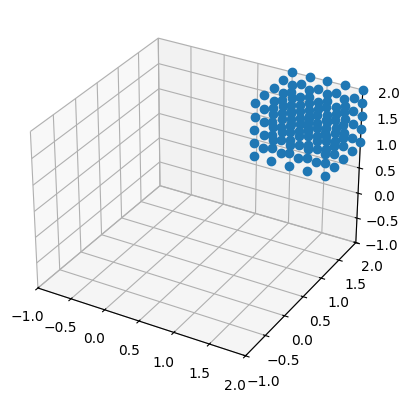

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
ax.set_zlim([-1, 2])

original, = ax.plot(x, y, z, 'o') # Modify this line to plot x, y, z

def update(frame):
    # Update the plot for animation
    # Hint: Calculate translated points and update the plot
    dx, dy, dz = frame, frame, frame # translation distances
    x_translated, y_translated, z_translated = translate_points(x, y, z, dx, dy, dz)
    original.set_data_3d(x_translated, y_translated, z_translated)
    return (original,)

# Create an animation
# Hint: Adjust frames and other parameters as needed
ani = FuncAnimation(fig, update, frames=np.linspace(-1, 1, 20), blit=True)

# Display the animation
HTML(ani.to_html5_video())

Experiment with different translation distances and directions to see how they affect the position of the grid in 3D space.

# 2. Implementing and Visualizing Rotations


In this section, we will look at 3D rotation, a pivotal geometric transformation. Unlike translation, which shifts objects in space, rotation involves pivoting objects around an axis and a specific point in space. Here, we will focus on rotating a grid of points around the x, y, and z axes, centered on a specific point $ (c_x, c_y, c_z) $.

Specifically, you will be required to implement a function to rotate points in 3D space around the axes and a specified center point. Then, you'll create an animation to visualize these points being rotated around the point $ (0.5, 0.5, 0.5) $

Rotation in 3D space can be represented by rotation matrices. For rotations around the x, y, and z axes, the rotation matrices $R_x(\theta)$, $R_y(\theta)$, and $R_z(\theta)$ are defined as follows, where $\theta$ is the rotation angle:

- Rotation around the x-axis:

$ R_x(\theta) = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos\theta & -\sin\theta \\ 0 & \sin\theta & \cos\theta \end{bmatrix} $

- Rotation around the y-axis:

$ R_y(\theta) = \begin{bmatrix} \cos\theta & 0 & \sin\theta \\ 0 & 1 & 0 \\ -\sin\theta & 0 & \cos\theta \end{bmatrix} $

- Rotation around the z-axis:

$ R_z(\theta) = \begin{bmatrix} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix} $

To rotate points around a center $(c_x, c_y, c_z)$ and an axis, we first translate the center of rotation to the origin, apply the rotation, and then translate back.

In [ ]:

def rotate_points_euler(angles):
    """
    Generate a composite rotation matrix from Euler angles.

    Parameters:
    - angles: Tuple of Euler angles (ax, ay, az) for rotation around the x, y, and z axes respectively.

    Returns:
    - R: The composite rotation matrix.
    """
    # Unpack the Euler angles
    ax, ay, az = angles

    # Rotation matrices around the x, y, and z axes
    # Your code here to define Rx, Ry, Rz
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(ax), -np.sin(ax)],
        [0, np.sin(ax), np.cos(ax)]
    ])
    Ry = np.array([
        [np.cos(ay), 0, np.sin(ay)],
        [0, 1, 0],
        [-np.sin(ay), 0, np.cos(ay)],
    ])
    Rz = np.array([
        [np.cos(az), -np.sin(az), 0],
        [np.sin(az), np.cos(az), 0],
        [0, 0, 1]
    ])

    # Composite rotation matrix R
    # Hint: How do you combine Rx, Ry, Rz into a single rotation matrix?
    # Your code here
    R = Rx @ Ry @ Rz

    return R

Visualize the Rotation

To visualize the rotation around the point \( (0.5, 0.5, 0.5) \), we will modify the `update` function in our animation to rotate the grid of points:


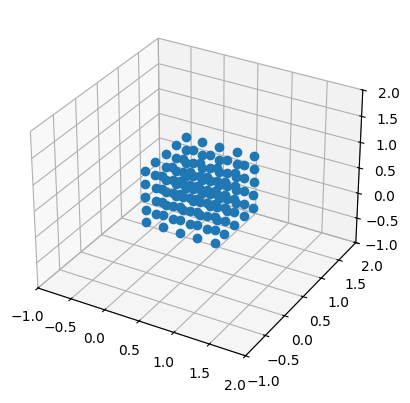

In [ ]:
# Set up the figure and 3D axis for animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Define axis limits
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
ax.set_zlim([-1, 2])

# Initial plot setup
# Hint: Initialize x, y, z with the points you want to animate
X, Y, Z = np.mgrid[0:1.01:0.25, 0:1.01:0.25, 0:1.01:0.25]
x, y, z = X.flatten(), Y.flatten(), Z.flatten()  # Initialize your points here
original, = ax.plot(x, y, z, 'o')  # Modify this line to plot initial x, y, z

def update(frame):
    # Define rotation angles
    # Hint: Convert frame to radians and decide which axes to rotate around
    theta_x, theta_y, theta_z = frame * np.pi / 180, 0, 0  # Modify these values based on the animation frame

    # Rotate points
    # Your code here to calculate x_rotated, y_rotated, z_rotated using your rotation function
    p = np.vstack([x, y, z])
    p_centered = p - 0.5  # translate so the rotation center is at the origin
    R = rotate_points_euler((theta_x, theta_y, theta_z))
    p_rotated = R @ p_centered
    p = p_rotated + 0.5
    x_rotated, y_rotated, z_rotated = p[0], p[1], p[2]

    # Update plot data
    # Your code here to update original plot object with the rotated points
    original.set_data_3d(x_rotated, y_rotated, z_rotated)

    return original,

# Create an animation
# Hint: Adjust frames range and interval as needed for a smooth animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 360, 90), blit=True)

# Display the animation
# Hint: Ensure the animation is displayed correctly in your notebook or output
HTML(ani.to_html5_video())

Now try the same, but for the other axes and with different centers of rotation

# 3. Camera Projection

In this final part of the lab, we explore the projection of 3D points into a 2D plane. Unlike previous exercises where we manipulated the object in 3D space, here we simulate the effect of a camera moving around the object. The objective is to create a dynamic perspective, showcasing how changing camera positions and orientations affect the projection of 3D objects onto 2D images. This exercise is crucial for understanding camera models, perspective transformation, and their applications in computer vision and graphics.

Your task is to project a grid of 3D points into a 2D image from various camera positions. Specifically, you will generate a set of camera poses that represent the camera moving in a circle around the object while always facing the center of the scene. This simulates a common scenario in computer vision and robotics, where understanding the change in perspective is essential for tasks such as 3D reconstruction, navigation, and object detection.

### Step 1: Define the intrinsic matrix
The camera intrinsic matrix $K$ models the camera's internal parameters, such as focal length and optical center. In this exercise we will use the following intrinsic parameters with images of size w=512,h=512:

In [ ]:
K = np.array([[200, 0, 256],
              [0, 200, 256],
              [0, 0, 1]])

**Question**: What is the angle of view of this camera?

### Step 2: Perspective projection

To project the 3D points onto a 2D plane from the camera's perspective, we use the perspective projection formula. The formula relates a 3D point in the world coordinates to its 2D image coordinates through a series of transformations, including translation to the camera frame and perspective division.


In [ ]:
def project_points(points, T_cw, K):
    """
    Project 3D points onto a 2D plane using a camera transformation matrix and intrinsic matrix.

    Parameters:
    - points: Array of 3D points.
    - T_cw: Extrinsic camera transformation matrix.
    - K: Intrinsic camera matrix.

    Returns:
    - 2D projected points.
    """
    # Convert points to homogeneous coordinates
    # Your code here to convert points to homogeneous coordinates
    points_homogeneous = np.vstack([points, np.ones((1, points.shape[1]))])

    # Apply the extrinsic matrix to bring points into the camera coordinate system
    # Your code here to apply T_cw
    points_camera = T_cw @ points_homogeneous

    # Apply the intrinsic matrix K to project onto 2D
    # Your code here to apply K and project points
    points_projected = K @ points_camera[:3, :]  # Use only the x, y, z components

    # Normalize to convert to 2D points
    # Your code here to normalize points
    points_2d = points_projected[:2, :] / points_projected[2, :]

    return points_2d

### Step 3: Generate Camera Poses

Simulate the camera moving in a circle around the center of the grid, keeping its orientation towards the grid's center.


In [ ]:
def generate_camera_poses(n_poses):
    """
    Generate camera poses for a camera moving in a circle around the center of a grid.

    Parameters:
    - n_poses: The number of camera poses to generate.

    Returns:
    - A list of camera orientations, each orientation towards the grid's center.
    """
    # Generate angles for each pose
    angles = np.linspace(0, 2 * np.pi, n_poses, endpoint=False)

    poses = []
    for angle in angles:
        # Calculate the camera orientation towards the center of the grid
        # Hint: You may need to adjust the orientation based on your coordinate system
        camera_orientation = np.array([0, angle, 0])  # Your code here to define the orientation

        poses.append(camera_orientation)

    return poses

### Step 4: Visualize the 2D Projections with Moving Camera

Create an animation to visualize how the projection changes as the camera moves around the object.

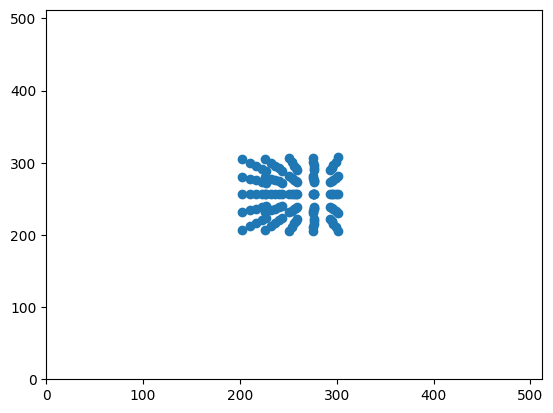

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Generate camera poses
n_poses = 60  # Define the number of poses
rotation_angles = generate_camera_poses(n_poses)  # Your code to generate poses
radius = 2.5  # Define the radius of the camera's circular path

# Setup plot for animation
fig, ax = plt.subplots()
ax.set_xlim(0, 512)  # Set appropriate limits based on your projection
ax.set_ylim(0, 512)  # Set appropriate limits based on your projection
scatter = ax.scatter([], [])  # Initialize scatter plot

def update(frame):
    # Get the current camera orientation
    camera_orientation = rotation_angles[frame]

    # Compute rotation matrix from camera orientation
    # Your code here to calculate the rotation matrix R based on camera_orientation
    R = rotate_points_euler(camera_orientation)

    # Compute the transformation matrices
    # Your code here to define the object-to-world transformation matrix T_wo
    T_wo = np.eye(4) # transform from object to world
    # NOTE: We use -0.5 here and not 0.5 for Obj->World Rotations, to make the center of the cube coincide with the world origin (0, 0, 0),
    # we must shift it by -0.5 in each direction.
    T_wo[:3,  3] = np.array([-0.5, -0.5, -0.5]) # rotations
    # Your code here to create the extrinsic matrix by combining rotation and translation
    T_a = np.eye(4) # initialize a 4x4 identity matrix
    T_a[:3, 3] = np.array([0.0, 0.0, radius]) # set the translation
    T_b = np.eye(4) # initialize a 4x4 identity matrix
    T_b[:3, :3] = R # set the rotation
    T_wc = T_b @ T_a
    T_cw = np.linalg.inv(T_wc)
    T_co = T_cw @ T_wo

    # Project points onto 2D plane
    # Your code here to project points using the computed matrices
    points = np.vstack([x, y, z])
    projected = project_points(points, T_co, K)

    # Update scatter plot with the new 2D points
    scatter.set_offsets(projected.T)

    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=n_poses, blit=True)

# Display the animation
HTML(ani.to_html5_video())

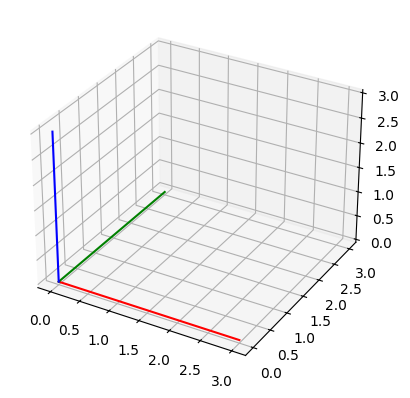

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot([0,1,2,3],[0,0,0,0],[0,0,0,0],color='r')
ax1.plot([0,0,0,0],[0,1,2,3],[0,0,0,0],color='g')
ax1.plot([0,0,0,0],[0,0,0,0],[0,1,2,3],color='b')
fig1.show()